# Breast Cancer Predictive Model

The objective of this project is to use the Breast Cancer Dataset form Kaggle to create and tune a supervised machine learning model that succesfully predicts whether a tumor is benign or malign based on the features of the dataset.

## Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [6]:
df.diagnosis = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:ylabel='Frequency'>

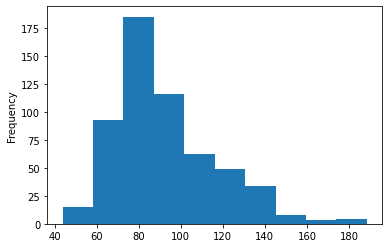

In [9]:
df['perimeter_mean'].plot(kind='hist')

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

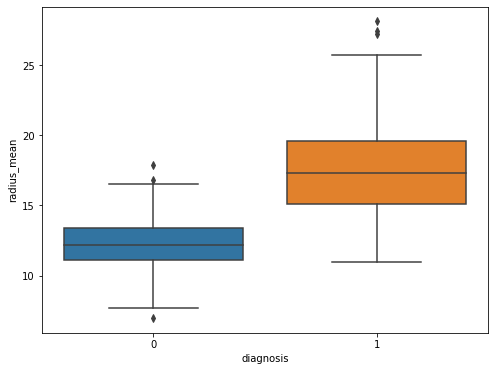

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.diagnosis, y=df.radius_mean)

<AxesSubplot:xlabel='diagnosis', ylabel='radius_se'>

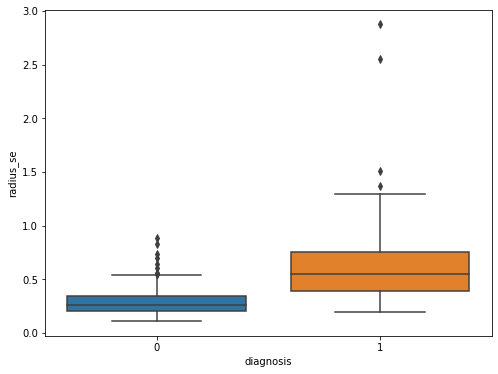

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.diagnosis, y=df.radius_se)

<AxesSubplot:xlabel='diagnosis', ylabel='radius_worst'>

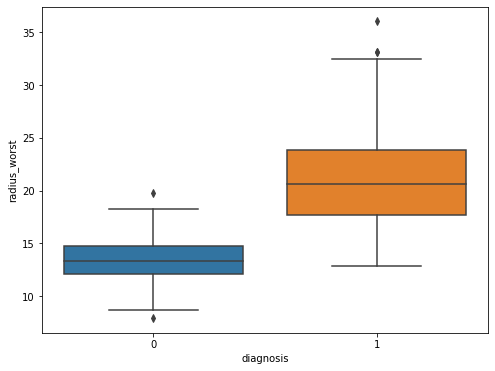

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.diagnosis, y=df.radius_worst)

## Finding associations

There seems to be 3 main groups with the same measurements: mean, se and worst. It would be optimal to choose for each measurement, let's say radius, which one best predicts the diagnosis. Intuitiveley I would choose the one with the most variance.

<AxesSubplot:>

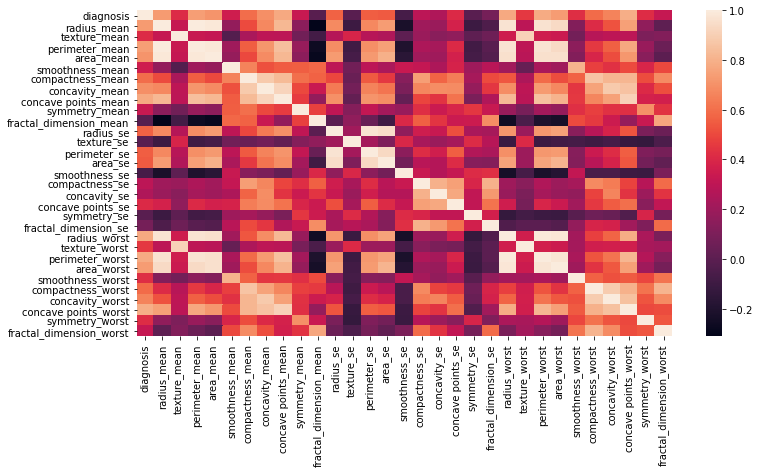

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr())

In [12]:
from scipy.stats import pointbiserialr

In [32]:
metrics = [column[:-5] for column in list(df.columns) if 'mean' in column]
categories = ['mean', 'se', 'worst']

best_metrics = []

for metric in metrics:
    correlations = {}
    for category in categories:
        column = f'{metric}_{category}'
        corr, pval = pointbiserialr(df[column], df['diagnosis'])
        correlations[column] = corr
    best_category = max(correlations, key=correlations.get)
    best_metrics.append(best_category)

best_metrics

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_mean',
 'concavity_mean',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

<AxesSubplot:>

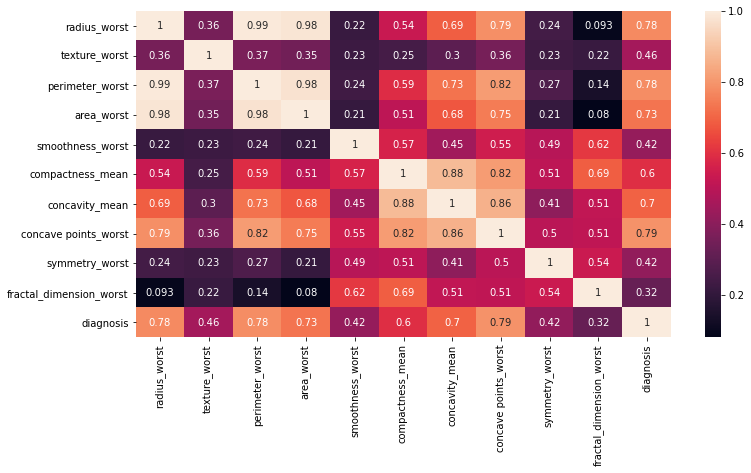

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[best_metrics + ['diagnosis']].corr(), annot=True)

<Figure size 864x432 with 0 Axes>

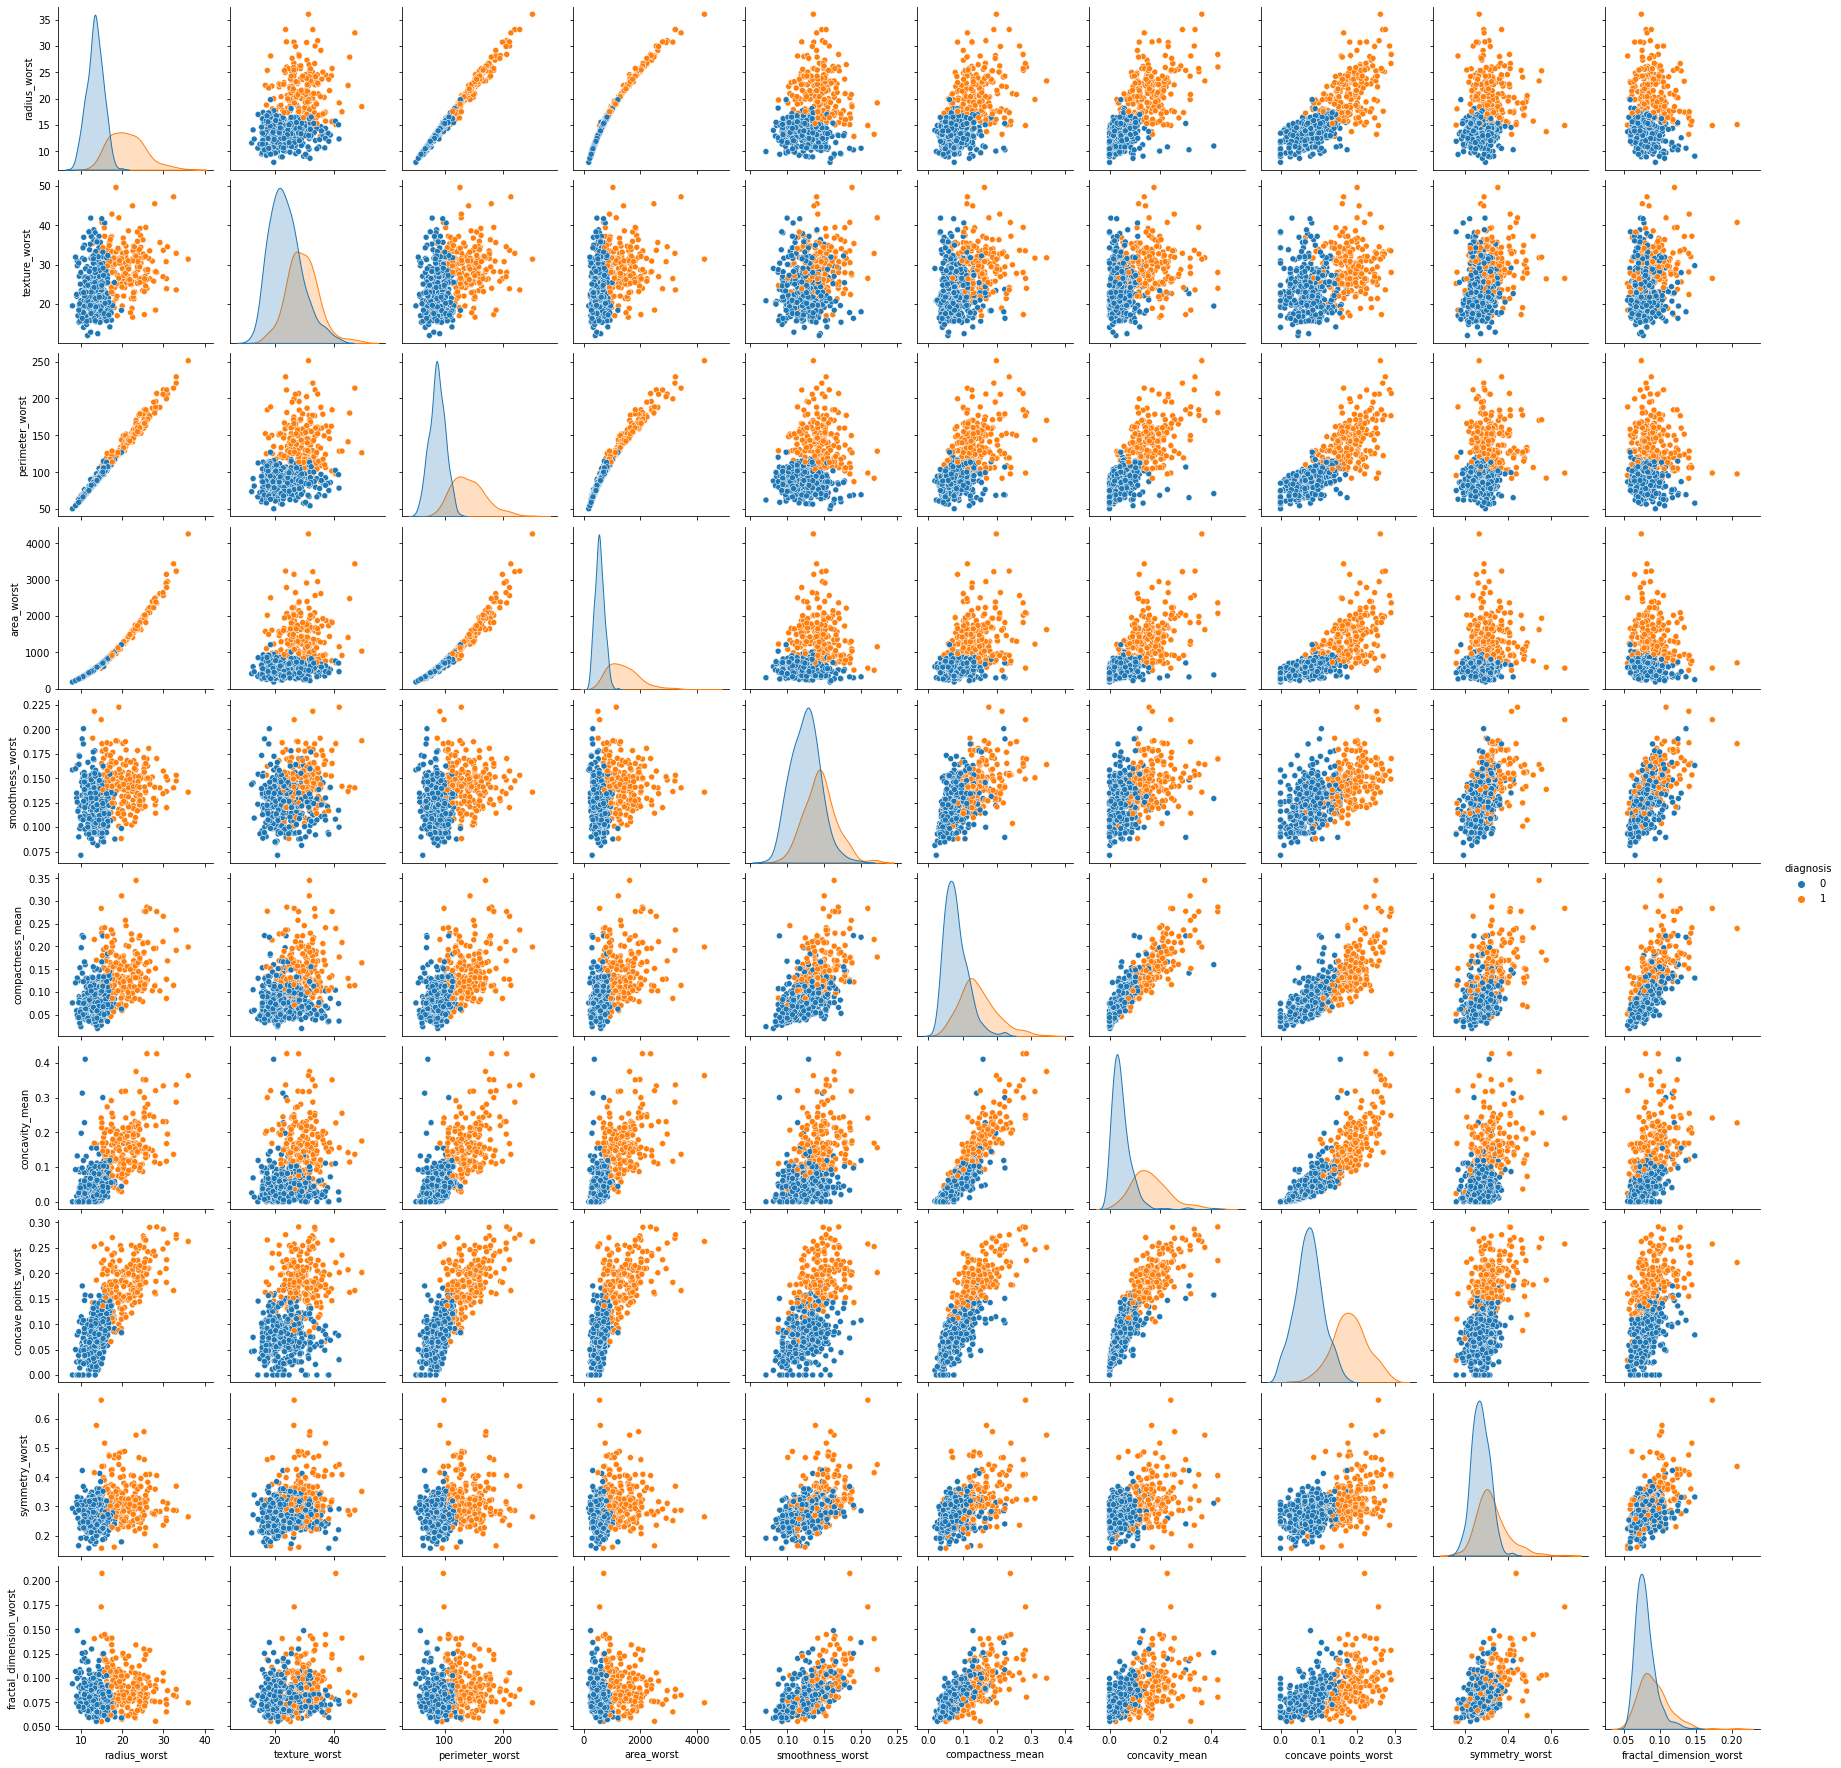

In [15]:
columns = best_metrics + ['diagnosis']

plt.figure(figsize=(12, 6))
sns.pairplot(data=df[columns], hue='diagnosis')

In [33]:
# Removed area_worst feature because it is highly related to perimeter and radius, but is the least related to the diagnosis

best_metrics.remove('area_worst')

## Logistic Regression

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(df[best_metrics]), columns=best_metrics)
y = df.diagnosis

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_train_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_train = pd.Series(scores_dict)
scores_train

accuracy     0.947253
recall       0.905325
precision    0.950311
f1           0.927273
dtype: float64

In [30]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores_dict = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

scores_test = pd.Series(scores_dict)
scores_test

accuracy     0.938596
recall       0.906977
precision    0.928571
f1           0.917647
dtype: float64

# Conclusions

The model has an objectively good performance at this point, showing that it does a great job at predicting data outside the one it was trained with. The high metrics indicate that indeed the features chosen were optimal for the model fitting.